## Perform clustering for the telcom churn data to obtain optimum number of clusters.

In [ ]:
#Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [2]:
df_telcom = pd.read_excel(r'D:\360digi\DS\Sharath\Hierarchical_clustering2\HandsOn\Dataset_Assignment Clustering\Telco_customer_churn.xlsx', sheet_name = 0)
df_telcom.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [3]:
df_telcom.head()

Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0  8779-QRDMV      1      Q3                No                    0   
1  7495-OOKFY      1      Q3               Yes                    1   
2  1658-BYGOY      1      Q3                No                    0   
3  4598-XLKNJ      1      Q3               Yes                    1   
4  4846-WHAFZ      1      Q3               Yes                    1   

   Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges  \
0                 1     None            No                               0.00   
1                 8  Offer E           Yes                              48.85   
2                18  Offer D           Yes                              11.33   
3                25  Offer C           Yes                              19.76   
4                37  Offer C           Yes                               6.33   

  Multiple Lines  ... Unlimited Data        Contract  Paperless Billing  \
0             No  ...             No  Month-to-Month                Yes   
1            Yes  ...            Yes  Month-to-Month                Yes   
2            Yes  ...            Yes  Month-to-Month                Yes   
3             No  ...            Yes  Month-to-Month                Yes   
4            Yes  ...            Yes  Month-to-Month                Yes   

    Payment Method Monthly Charge Total Charges Total Refunds  \
0  Bank Withdrawal          39.65         39.65          0.00   
1      Credit Card          80.65        633.30          0.00   
2  Bank Withdrawal          95.45       1752.55         45.61   
3  Bank Withdrawal          98.50       2514.50         13.43   
4  Bank Withdrawal          76.50       2868.15          0.00   

  Total Extra Data Charges Total Long Distance Charges Total Revenue  
0                       20                        0.00         59.65  
1                        0                      390.80       1024.10  
2                        0                      203.94       1910.88  
3                        0                      494.00       2995.07  
4                        0                      234.21       3102.36  

[5 rows x 30 columns]

In [4]:
df_telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

## EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

In [5]:
print(df_telcom.mean())
print('\n')
print(df_telcom.median())
print('\n')
print(df_telcom.mode())

#huge difference in values for mean and median, indicating presence of outliers

Count                                   1.000000
Number of Referrals                     1.951867
Tenure in Months                       32.386767
Avg Monthly Long Distance Charges      22.958954
Avg Monthly GB Download                20.515405
Monthly Charge                         64.761692
Total Charges                        2280.381264
Total Refunds                           1.962182
Total Extra Data Charges                6.860713
Total Long Distance Charges           749.099262
Total Revenue                        3034.379056
dtype: float64


Count                                   1.00
Number of Referrals                     0.00
Tenure in Months                       29.00
Avg Monthly Long Distance Charges      22.89
Avg Monthly GB Download                17.00
Monthly Charge                         70.35
Total Charges                        1394.55
Total Refunds                           0.00
Total Extra Data Charges                0.00
Total Long Distance Charges           4

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#2nd Moment Business Decision(Measure of Dispersion)

In [7]:
print(df_telcom.var())
print('\n')
print(df_telcom.std())

Count                                0.000000e+00
Number of Referrals                  9.007197e+00
Tenure in Months                     6.023128e+02
Avg Monthly Long Distance Charges    2.386442e+02
Avg Monthly GB Download              4.169331e+02
Monthly Charge                       9.054109e+02
Total Charges                        5.135755e+06
Total Refunds                        6.245131e+01
Total Extra Data Charges             6.302599e+02
Total Long Distance Charges          7.168332e+05
Total Revenue                        8.209397e+06
dtype: float64


Count                                   0.000000
Number of Referrals                     3.001199
Tenure in Months                       24.542061
Avg Monthly Long Distance Charges      15.448113
Avg Monthly GB Download                20.418940
Monthly Charge                         30.090047
Total Charges                        2266.220462
Total Refunds                           7.902614
Total Extra Data Charges               25

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#3rd Business Moment Decision (Skewness)

In [9]:
df_telcom.skew()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Count                                0.000000
Number of Referrals                  1.446060
Tenure in Months                     0.240543
Avg Monthly Long Distance Charges    0.049176
Avg Monthly GB Download              1.216584
Monthly Charge                      -0.220524
Total Charges                        0.963791
Total Refunds                        4.328517
Total Extra Data Charges             4.091209
Total Long Distance Charges          1.238282
Total Revenue                        0.919410
dtype: float64

In [10]:
#4th Business Moment Decision (Kurtosis)

In [11]:
df_telcom.kurt()

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Count                                 0.000000
Number of Referrals                   0.721964
Tenure in Months                     -1.387052
Avg Monthly Long Distance Charges    -1.254654
Avg Monthly GB Download               0.881502
Monthly Charge                       -1.257260
Total Charges                        -0.227693
Total Refunds                        18.350658
Total Extra Data Charges             16.458874
Total Long Distance Charges           0.644092
Total Revenue                        -0.203457
dtype: float64

In [12]:
df_telcom.describe()

Count  Number of Referrals  Tenure in Months  \
count  7043.0          7043.000000       7043.000000   
mean      1.0             1.951867         32.386767   
std       0.0             3.001199         24.542061   
min       1.0             0.000000          1.000000   
25%       1.0             0.000000          9.000000   
50%       1.0             0.000000         29.000000   
75%       1.0             3.000000         55.000000   
max       1.0            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                20.515405   
std                            15.448113                20.418940   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                27.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        64.761692    2280.381264       1.962182                  6.860713   
std         30.090047    2266.220462       7.902614                 25.104978   
min         18.250000      18.800000       0.000000                  0.000000   
25%         35.500000     400.150000       0.000000                  0.000000   
50%         70.350000    1394.550000       0.000000                  0.000000   
75%         89.850000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

In [13]:
df_telcom.dtypes  #Typecasting is not required

Customer ID                           object
Count                                  int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

In [14]:
# The count column mentions the count of customer. Which is '1' for every customer. So we can ignore the column by dropping it from the dataset.
df_telcom.drop(['Count'], axis = 1, inplace = True)

#### Handling duplicate

In [15]:
#Handling duplicates
duplicate = df_telcom.duplicated()
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


0

In [16]:
sum(duplicate)

0

In [17]:
duplicate.unique()  #No duplicate records exists.

array([False])

#### Missing value analysis

In [18]:
#Check for missing values
df_telcom.isnull().sum() #No missing values

Customer ID                          0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds            

#### Dividing Categorical and Numerical variables from dataset

In [19]:
df_telcom.dtypes

Customer ID                           object
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Me

In [20]:
df_telcom_num = df_telcom.iloc[:,[3,4,7,11,23,24,25,26,27,28]].copy()
df_telcom_num.head()

Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0                    0                 1                               0.00   
1                    1                 8                              48.85   
2                    0                18                              11.33   
3                    1                25                              19.76   
4                    1                37                               6.33   

   Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
0                        8           39.65          39.65           0.00   
1                       17           80.65         633.30           0.00   
2                       52           95.45        1752.55          45.61   
3                       12           98.50        2514.50          13.43   
4                       14           76.50        2868.15           0.00   

   Total Extra Data Charges  Total Long Distance Charges  Total Revenue  
0                        20                         0.00          59.65  
1                         0                       390.80        1024.10  
2                         0                       203.94        1910.88  
3                         0                       494.00        2995.07  
4                         0                       234.21        3102.36

In [21]:
#extracting column indexes of categorical data

all_col_list = list(np.arange(len(df_telcom.columns)));
col_list = [3,4,7,11,23,24,25,26,27,28];
rem_col = np.setdiff1d(all_col_list,col_list);print(rem_col)

[ 0  1  2  5  6  8  9 10 12 13 14 15 16 17 18 19 20 21 22]


In [22]:
df_telcom_cate = df_telcom.iloc[:,rem_col].copy()
df_telcom_cate.head()

Customer ID Quarter Referred a Friend    Offer Phone Service Multiple Lines  \
0  8779-QRDMV      Q3                No     None            No             No   
1  7495-OOKFY      Q3               Yes  Offer E           Yes            Yes   
2  1658-BYGOY      Q3                No  Offer D           Yes            Yes   
3  4598-XLKNJ      Q3               Yes  Offer C           Yes             No   
4  4846-WHAFZ      Q3               Yes  Offer C           Yes            Yes   

  Internet Service Internet Type Online Security Online Backup  \
0              Yes           DSL              No            No   
1              Yes   Fiber Optic              No           Yes   
2              Yes   Fiber Optic              No            No   
3              Yes   Fiber Optic              No           Yes   
4              Yes   Fiber Optic              No            No   

  Device Protection Plan Premium Tech Support Streaming TV Streaming Movies  \
0                    Yes                   No           No              Yes   
1                     No                   No           No               No   
2                     No                   No          Yes              Yes   
3                    Yes                   No          Yes              Yes   
4                     No                   No           No               No   

  Streaming Music Unlimited Data        Contract Paperless Billing  \
0              No             No  Month-to-Month               Yes   
1              No            Yes  Month-to-Month               Yes   
2             Yes            Yes  Month-to-Month               Yes   
3              No            Yes  Month-to-Month               Yes   
4              No            Yes  Month-to-Month               Yes   

    Payment Method  
0  Bank Withdrawal  
1      Credit Card  
2  Bank Withdrawal  
3  Bank Withdrawal  
4  Bank Withdrawal

### Outlier Analysis

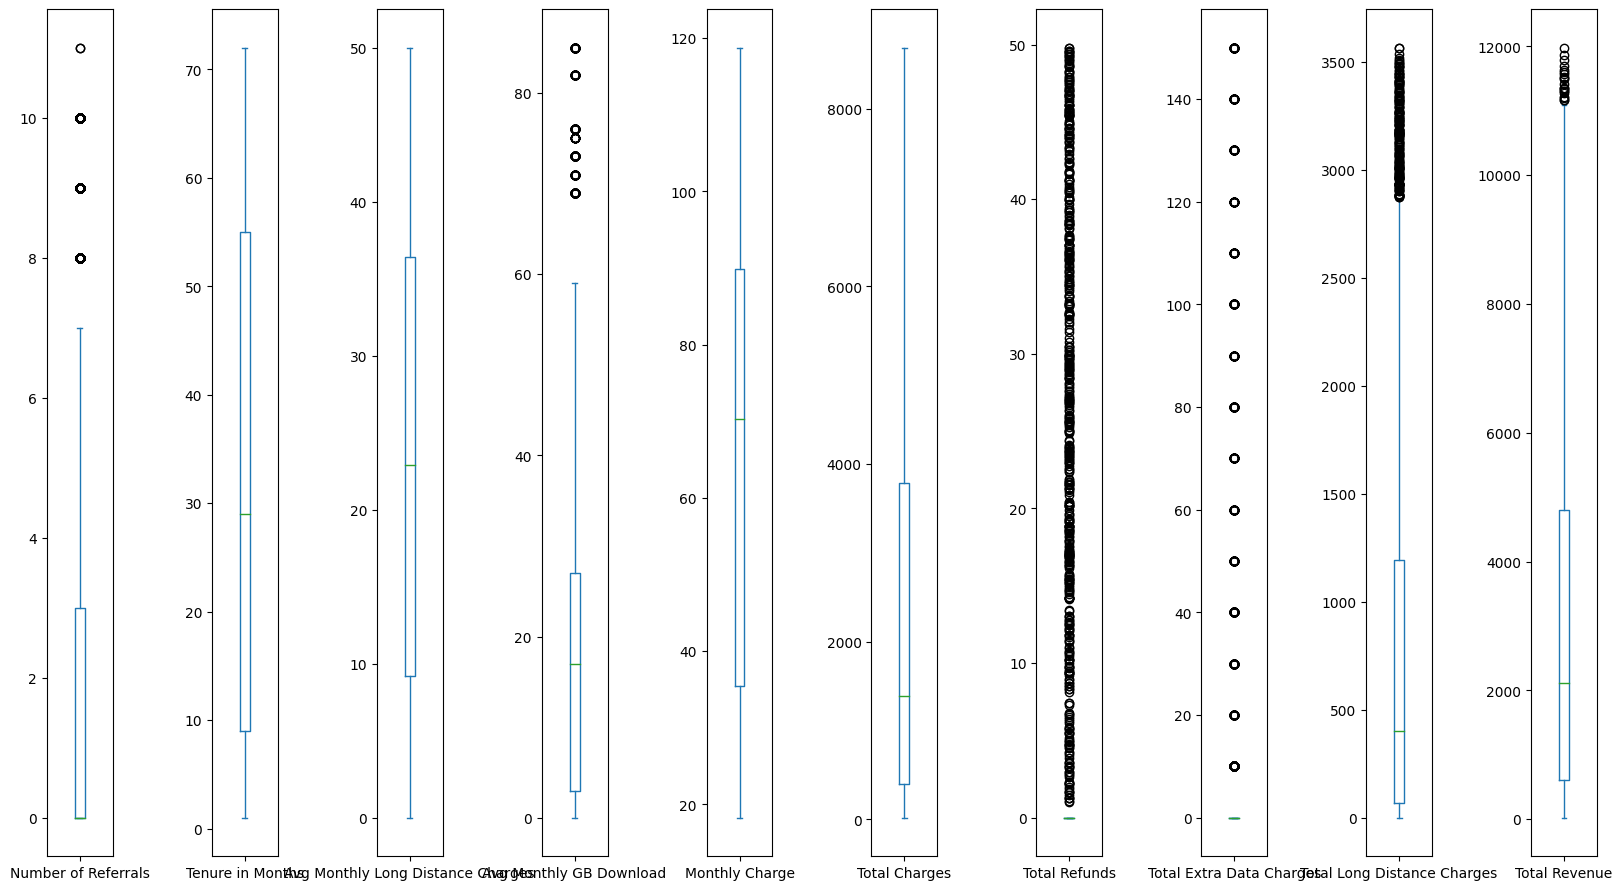

In [23]:
#Box plot visualization to view the outliers.

df_telcom_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 11))

plt.subplots_adjust(wspace = 1.5)
plt.show()


#Number of Referrals, Avg Monthly GB Download, Total Refunds, Total Extra Data Charges, Total Long Distances Charges, Total Revenue columns have outliers


In [24]:
df_telcom_num.columns

Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

# Winsorizaton

In [25]:
# Winsorization for "Number of Referrals" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Number of Referrals'])

df_telcom_num['Number of Referrals'] = winsor.fit_transform(df_telcom_num[['Number of Referrals']])


In [26]:
# Winsorization for "Avg Monthly GB Download" column
winsor = Winsorizer(capping_method = 'iqr', tail= 'both', fold = 1.5, variables = ['Avg Monthly GB Download'])

df_telcom_num['Avg Monthly GB Download'] = winsor.fit_transform(df_telcom_num[['Avg Monthly GB Download']])

In [27]:
# Winsorization for "Total Long Distance Charges" column

winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables=['Total Long Distance Charges'])

df_telcom_num['Total Long Distance Charges'] = winsor.fit_transform(df_telcom_num[['Total Long Distance Charges']])

In [28]:
# Winsorization for "Total Revenue" column
winsor = Winsorizer(capping_method = 'iqr', tail =  'both', fold = 1.5, variables = ['Total Revenue'])

df_telcom_num['Total Revenue'] = winsor.fit_transform(df_telcom_num[['Total Revenue']])

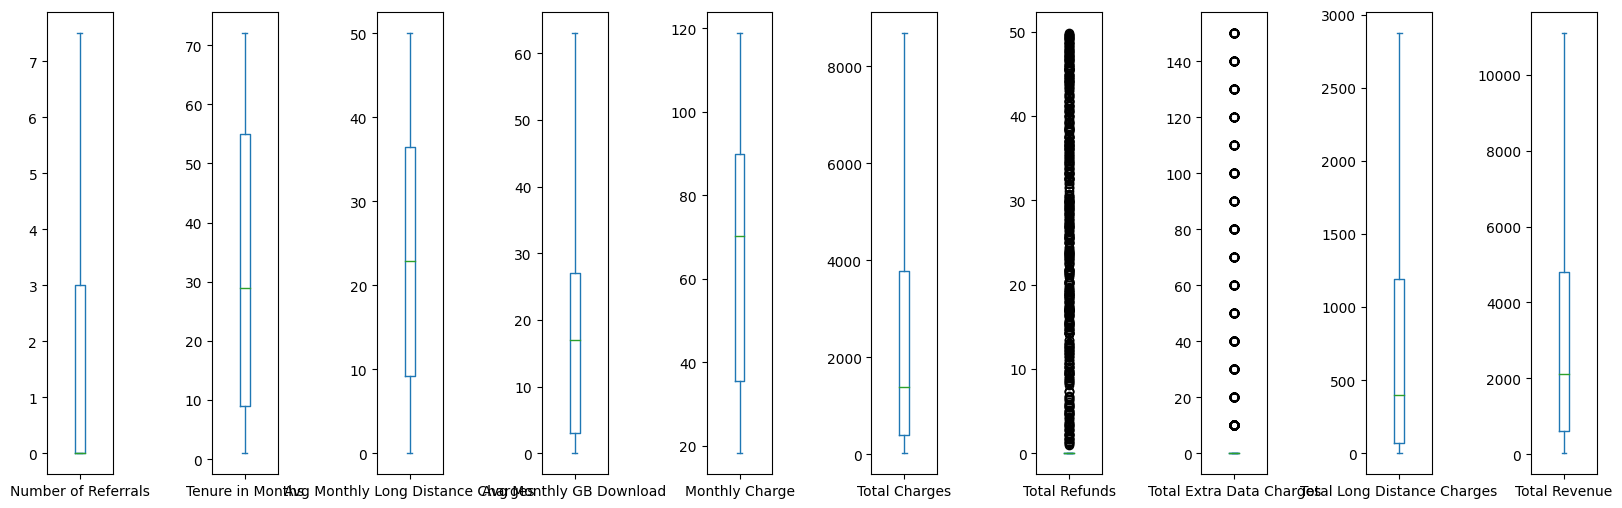

In [29]:
#Box plot visualization to view after the removal of outliers.

df_telcom_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6))

plt.subplots_adjust(wspace = 1.5)
plt.show()


In [30]:
# Winsorization technique cannot be applied to columns 'Total Refunds, Total Extra Data Charges' because the variation in data is low. 

In [ ]:
# Winsorization for "Total Refunds" column
# winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Total Refunds'])

# df['Total Refunds'] = winsor.fit_transform(df[['Total Refunds']])

In [ ]:
# Winsorization for "Total Extra Data Charges" column
# winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Total Extra Data Charges'])

# df['Total Extra Data Charges'] = winsor.fit_transform(df[['Total Extra Data Charges']])


In [31]:
df_telcom_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   float64
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   float64
 4   Monthly Charge                     7043 non-null   float64
 5   Total Charges                      7043 non-null   float64
 6   Total Refunds                      7043 non-null   float64
 7   Total Extra Data Charges           7043 non-null   int64  
 8   Total Long Distance Charges        7043 non-null   float64
 9   Total Revenue                      7043 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 550.4 KB


In [ ]:
# We consider these columns 'Total Refunds, Total Extra Data Charges' as it is and proceed to scale the data.


In [32]:
# Zero and near zero variance
df_telcom_num.var()

Number of Referrals                  7.081039e+00
Tenure in Months                     6.023128e+02
Avg Monthly Long Distance Charges    2.386442e+02
Avg Monthly GB Download              3.542979e+02
Monthly Charge                       9.054109e+02
Total Charges                        5.135755e+06
Total Refunds                        6.245131e+01
Total Extra Data Charges             6.302599e+02
Total Long Distance Charges          6.783791e+05
Total Revenue                        8.190948e+06
dtype: float64

#### Dummy variable creation for categorical data

In [33]:
df_telcom_cate.dtypes

Customer ID               object
Quarter                   object
Referred a Friend         object
Offer                     object
Phone Service             object
Multiple Lines            object
Internet Service          object
Internet Type             object
Online Security           object
Online Backup             object
Device Protection Plan    object
Premium Tech Support      object
Streaming TV              object
Streaming Movies          object
Streaming Music           object
Unlimited Data            object
Contract                  object
Paperless Billing         object
Payment Method            object
dtype: object

In [34]:
df_telcom_cate.shape

(7043, 19)

In [35]:
df_telcom_cate['Referred a Friend'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
df_telcom_cate.columns

Index(['Customer ID', 'Quarter', 'Referred a Friend', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method'],
      dtype='object')

In [37]:
# Applying One-Hot Encoding with get_dummies

df_telcom_cate = pd.get_dummies(df_telcom_cate, columns = ['Referred a Friend', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method'], drop_first = True)

In [38]:
df_telcom_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer ID                  7043 non-null   object
 1   Quarter                      7043 non-null   object
 2   Referred a Friend_Yes        7043 non-null   uint8 
 3   Offer_Offer A                7043 non-null   uint8 
 4   Offer_Offer B                7043 non-null   uint8 
 5   Offer_Offer C                7043 non-null   uint8 
 6   Offer_Offer D                7043 non-null   uint8 
 7   Offer_Offer E                7043 non-null   uint8 
 8   Phone Service_Yes            7043 non-null   uint8 
 9   Multiple Lines_Yes           7043 non-null   uint8 
 10  Internet Service_Yes         7043 non-null   uint8 
 11  Internet Type_DSL            7043 non-null   uint8 
 12  Internet Type_Fiber Optic    7043 non-null   uint8 
 13  Internet Type_None           7043

In [39]:
df_telcom_cate.shape

(7043, 27)

In [40]:
df_telcom_cate.head()

Customer ID Quarter  Referred a Friend_Yes  Offer_Offer A  Offer_Offer B  \
0  8779-QRDMV      Q3                      0              0              0   
1  7495-OOKFY      Q3                      1              0              0   
2  1658-BYGOY      Q3                      0              0              0   
3  4598-XLKNJ      Q3                      1              0              0   
4  4846-WHAFZ      Q3                      1              0              0   

   Offer_Offer C  Offer_Offer D  Offer_Offer E  Phone Service_Yes  \
0              0              0              0                  0   
1              0              0              1                  1   
2              0              1              0                  1   
3              1              0              0                  1   
4              1              0              0                  1   

   Multiple Lines_Yes  ...  Premium Tech Support_Yes  Streaming TV_Yes  \
0                   0  ...                         0                 0   
1                   1  ...                         0                 0   
2                   1  ...                         0                 1   
3                   0  ...                         0                 1   
4                   1  ...                         0                 0   

   Streaming Movies_Yes  Streaming Music_Yes  Unlimited Data_Yes  \
0                     1                    0                   0   
1                     0                    0                   1   
2                     1                    1                   1   
3                     1                    0                   1   
4                     0                    0                   1   

   Contract_One Year  Contract_Two Year  Paperless Billing_Yes  \
0                  0                  0                      1   
1                  0                  0                      1   
2                  0                  0                      1   
3                  0                  0                      1   
4                  0                  0                      1   

   Payment Method_Credit Card  Payment Method_Mailed Check  
0                           0                            0  
1                           1                            0  
2                           0                            0  
3                           0                            0  
4                           0                            0  

[5 rows x 27 columns]

### Graphical Representation

In [41]:
df_telcom_num.columns

Index(['Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

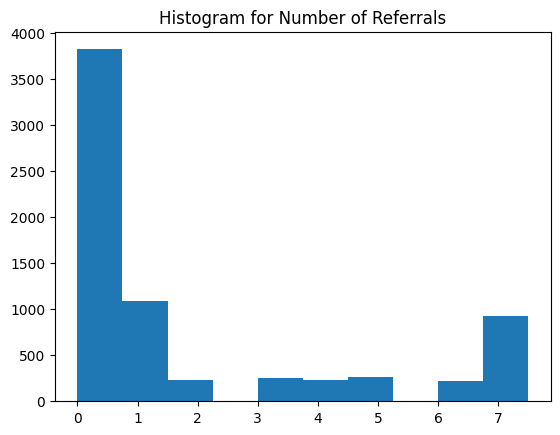

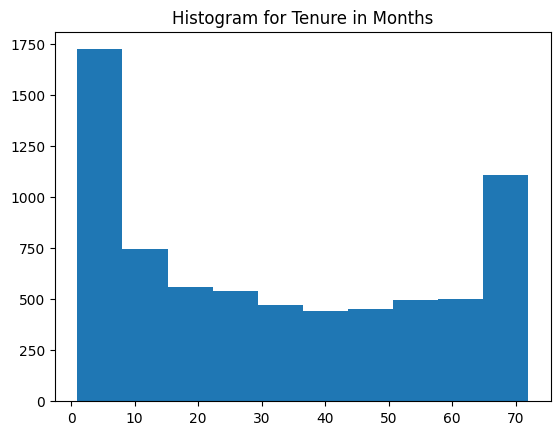

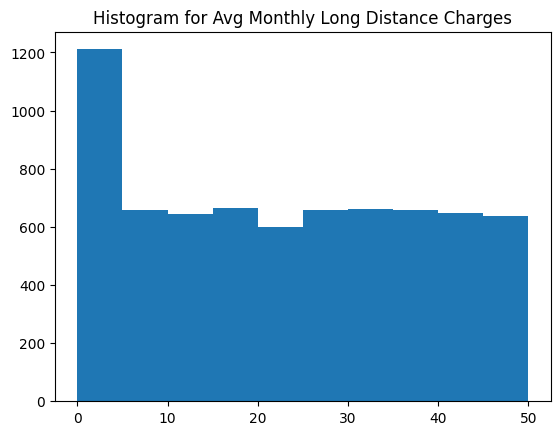

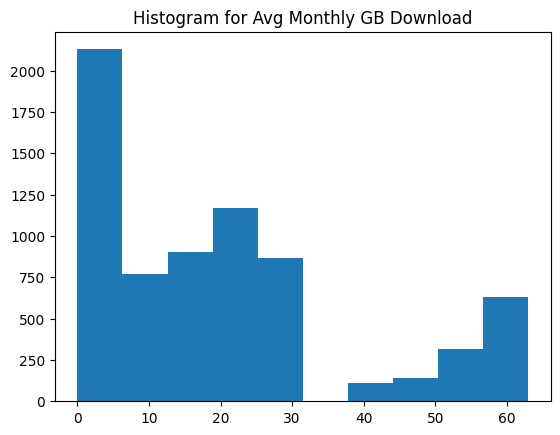

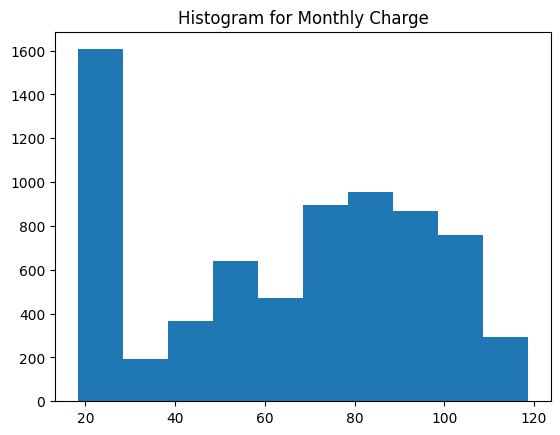

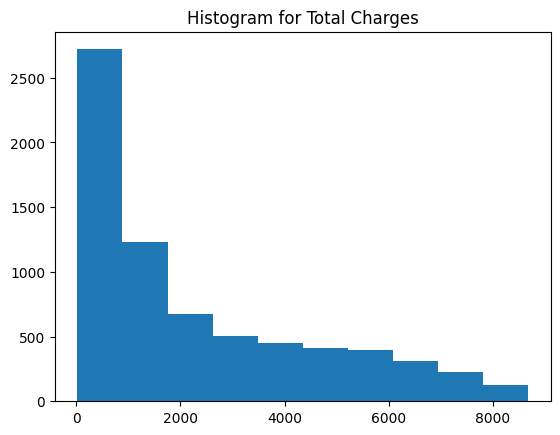

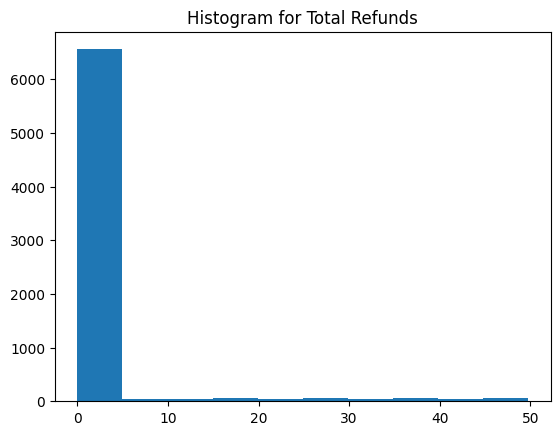

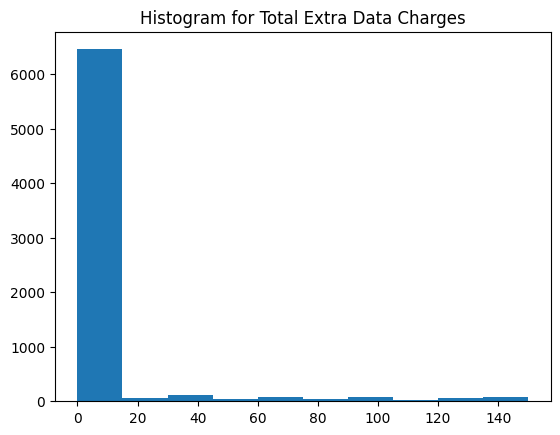

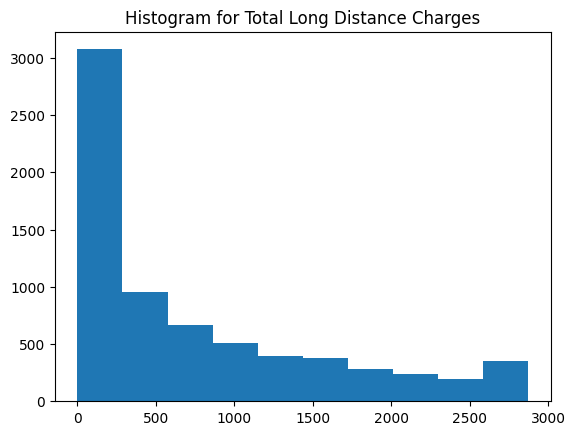

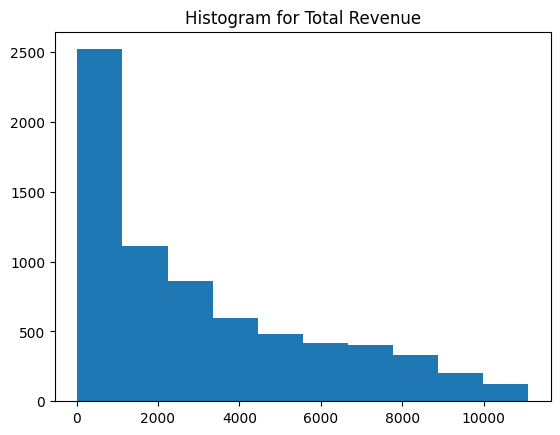

In [42]:
# Histogram describes the spread of data

for i in df_telcom_num.columns:
    plt.hist(x = df_telcom_num[i])
    plt.title("Histogram for "+str(i))
    plt.show()

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([0. , 0. , 0. , ..., 7.5, 7.5, 7.5])),
 (2.2082397225739157, 1.8059065739031661, 0.8294982185770023))

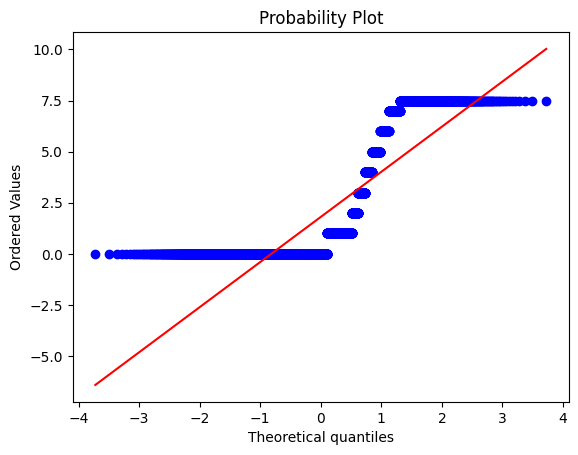

In [43]:
# Normal Q-Q Plot - Helps to understand if data is distributed Normally or not.

import scipy.stats as stats
import pylab

#checking whether data is normally distributed
stats.probplot(df_telcom_num['Number of Referrals'], dist="norm", plot = pylab)

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([ 1,  1,  1, ..., 72, 72, 72], dtype=int64)),
 (23.344299010567262, 32.38676700269772, 0.9507963999495085))

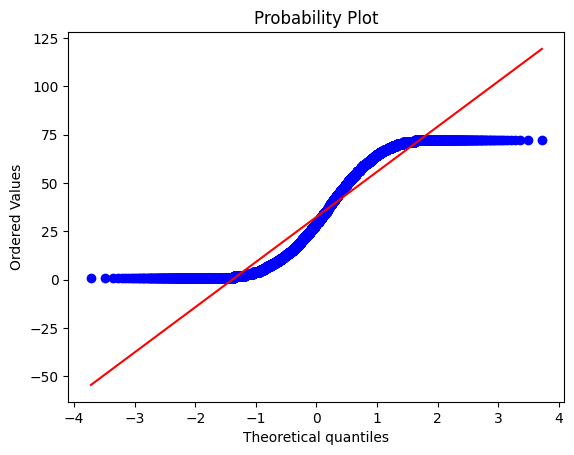

In [44]:
stats.probplot(df_telcom_num['Tenure in Months'], dist="norm", plot = pylab)

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([ 0.  ,  0.  ,  0.  , ..., 49.98, 49.98, 49.99])),
 (15.00628585435702, 22.958953570921484, 0.9709916395069308))

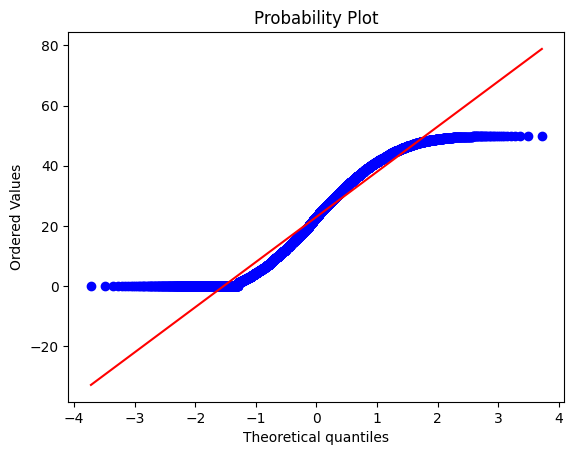

In [45]:
stats.probplot(df_telcom_num['Avg Monthly Long Distance Charges'], dist="norm", plot = pylab)

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([ 0.,  0.,  0., ..., 63., 63., 63.])),
 (17.545877203480288, 19.8902456339628, 0.9317694968800072))

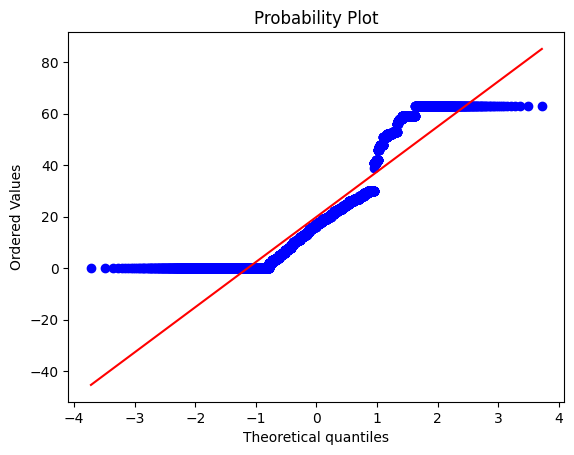

In [46]:
stats.probplot(df_telcom_num['Avg Monthly GB Download'], dist="norm", plot = pylab)

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([ 18.25,  18.4 ,  18.55, ..., 118.6 , 118.65, 118.75])),
 (28.893067756714895, 64.76169246059918, 0.9598171624851911))

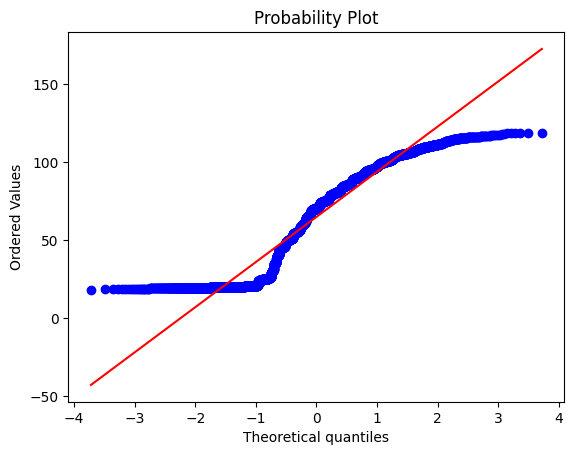

In [47]:
stats.probplot(df_telcom_num['Monthly Charge'], dist="norm", plot = pylab)

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([  18.8 ,   18.85,   18.85, ..., 8670.1 , 8672.45, 8684.8 ])),
 (2102.861250863682, 2280.3812636660514, 0.9275261969661445))

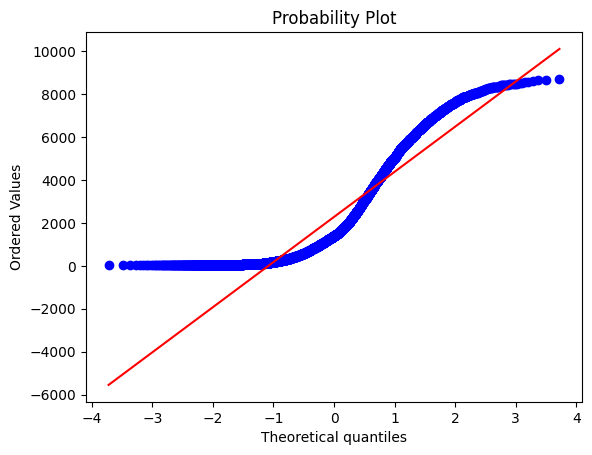

In [48]:
stats.probplot(df_telcom_num['Total Charges'], dist="norm", plot = pylab)

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([ 0.  ,  0.  ,  0.  , ..., 49.57, 49.76, 49.79])),
 (4.082681206097085, 1.96218230867528, 0.5164073342802852))

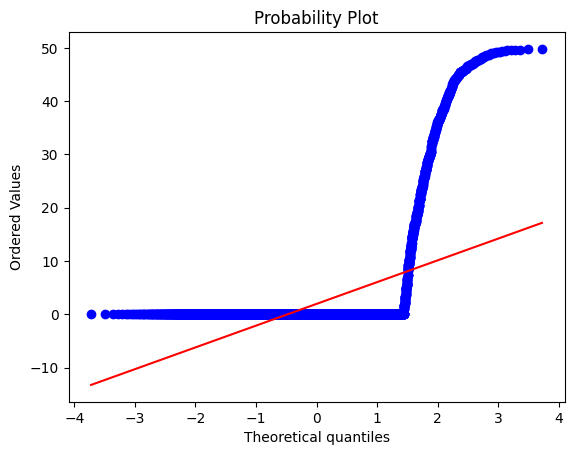

In [49]:
stats.probplot(df_telcom_num['Total Refunds'], dist="norm", plot = pylab)

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([  0,   0,   0, ..., 150, 150, 150], dtype=int64)),
 (13.797443295607739, 6.860712764446967, 0.5493593183584884))

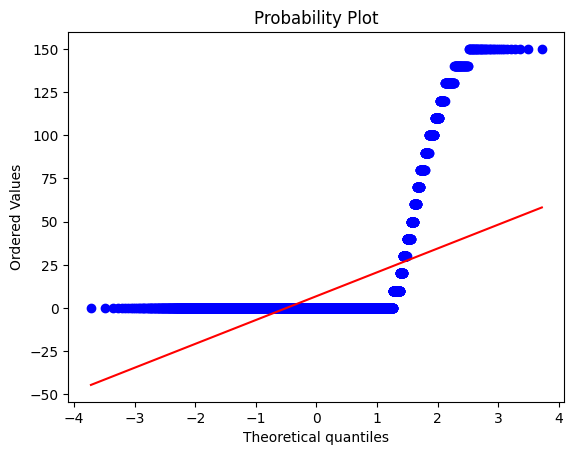

In [50]:
stats.probplot(df_telcom_num['Total Extra Data Charges'], dist="norm", plot = pylab)

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([   0.    ,    0.    ,    0.    , ..., 2871.9325, 2871.9325,
         2871.9325])),
 (750.0327946826551, 740.864881442567, 0.9102522379930257))

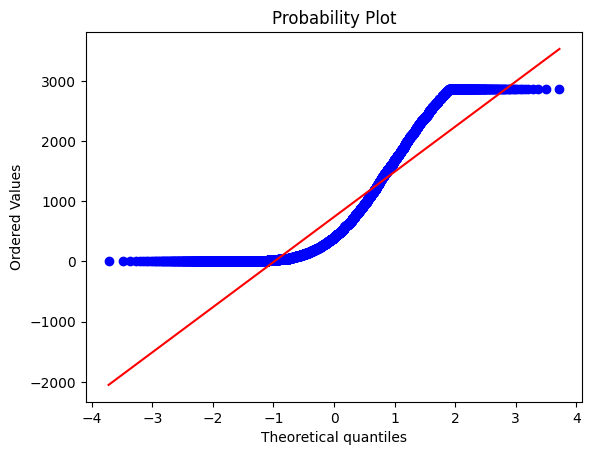

In [51]:
stats.probplot(df_telcom_num['Total Long Distance Charges'], dist="norm", plot = pylab)

((array([-3.72305933, -3.4929284 , -3.36634644, ...,  3.36634644,
          3.4929284 ,  3.72305933]),
  array([   21.36  ,    21.4   ,    21.61  , ..., 11094.4475, 11094.4475,
         11094.4475])),
 (2685.948803341109, 3033.269913034219, 0.9380983643246166))

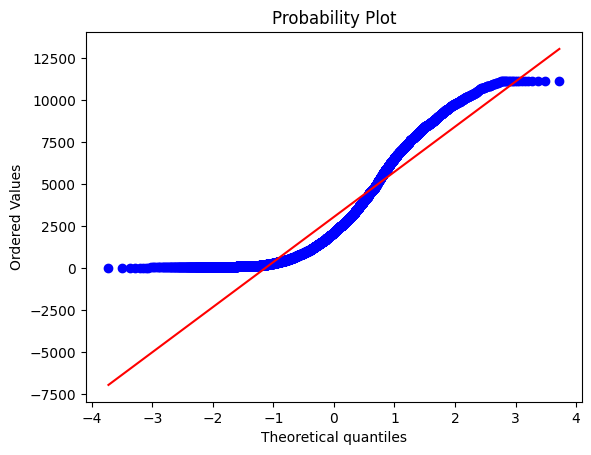

In [52]:
stats.probplot(df_telcom_num['Total Revenue'], dist="norm", plot = pylab)

In [53]:
df_telcom_num.head()

Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0                  0.0                 1                               0.00   
1                  1.0                 8                              48.85   
2                  0.0                18                              11.33   
3                  1.0                25                              19.76   
4                  1.0                37                               6.33   

   Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
0                      8.0           39.65          39.65           0.00   
1                     17.0           80.65         633.30           0.00   
2                     52.0           95.45        1752.55          45.61   
3                     12.0           98.50        2514.50          13.43   
4                     14.0           76.50        2868.15           0.00   

   Total Extra Data Charges  Total Long Distance Charges  Total Revenue  
0                        20                         0.00          59.65  
1                         0                       390.80        1024.10  
2                         0                       203.94        1910.88  
3                         0                       494.00        2995.07  
4                         0                       234.21        3102.36

In [54]:
#Concatenate the entire data
df_new = pd.concat([df_telcom_cate, df_telcom_num], axis = 1)
df_new.head()

Customer ID Quarter  Referred a Friend_Yes  Offer_Offer A  Offer_Offer B  \
0  8779-QRDMV      Q3                      0              0              0   
1  7495-OOKFY      Q3                      1              0              0   
2  1658-BYGOY      Q3                      0              0              0   
3  4598-XLKNJ      Q3                      1              0              0   
4  4846-WHAFZ      Q3                      1              0              0   

   Offer_Offer C  Offer_Offer D  Offer_Offer E  Phone Service_Yes  \
0              0              0              0                  0   
1              0              0              1                  1   
2              0              1              0                  1   
3              1              0              0                  1   
4              1              0              0                  1   

   Multiple Lines_Yes  ...  Number of Referrals  Tenure in Months  \
0                   0  ...                  0.0                 1   
1                   1  ...                  1.0                 8   
2                   1  ...                  0.0                18   
3                   0  ...                  1.0                25   
4                   1  ...                  1.0                37   

   Avg Monthly Long Distance Charges  Avg Monthly GB Download  Monthly Charge  \
0                               0.00                      8.0           39.65   
1                              48.85                     17.0           80.65   
2                              11.33                     52.0           95.45   
3                              19.76                     12.0           98.50   
4                               6.33                     14.0           76.50   

   Total Charges  Total Refunds  Total Extra Data Charges  \
0          39.65           0.00                        20   
1         633.30           0.00                         0   
2        1752.55          45.61                         0   
3        2514.50          13.43                         0   
4        2868.15           0.00                         0   

   Total Long Distance Charges  Total Revenue  
0                         0.00          59.65  
1                       390.80        1024.10  
2                       203.94        1910.88  
3                       494.00        2995.07  
4                       234.21        3102.36  

[5 rows x 37 columns]

In [55]:
df_new.shape

(7043, 37)

In [56]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Quarter                            7043 non-null   object 
 2   Referred a Friend_Yes              7043 non-null   uint8  
 3   Offer_Offer A                      7043 non-null   uint8  
 4   Offer_Offer B                      7043 non-null   uint8  
 5   Offer_Offer C                      7043 non-null   uint8  
 6   Offer_Offer D                      7043 non-null   uint8  
 7   Offer_Offer E                      7043 non-null   uint8  
 8   Phone Service_Yes                  7043 non-null   uint8  
 9   Multiple Lines_Yes                 7043 non-null   uint8  
 10  Internet Service_Yes               7043 non-null   uint8  
 11  Internet Type_DSL                  7043 non-null   uint8

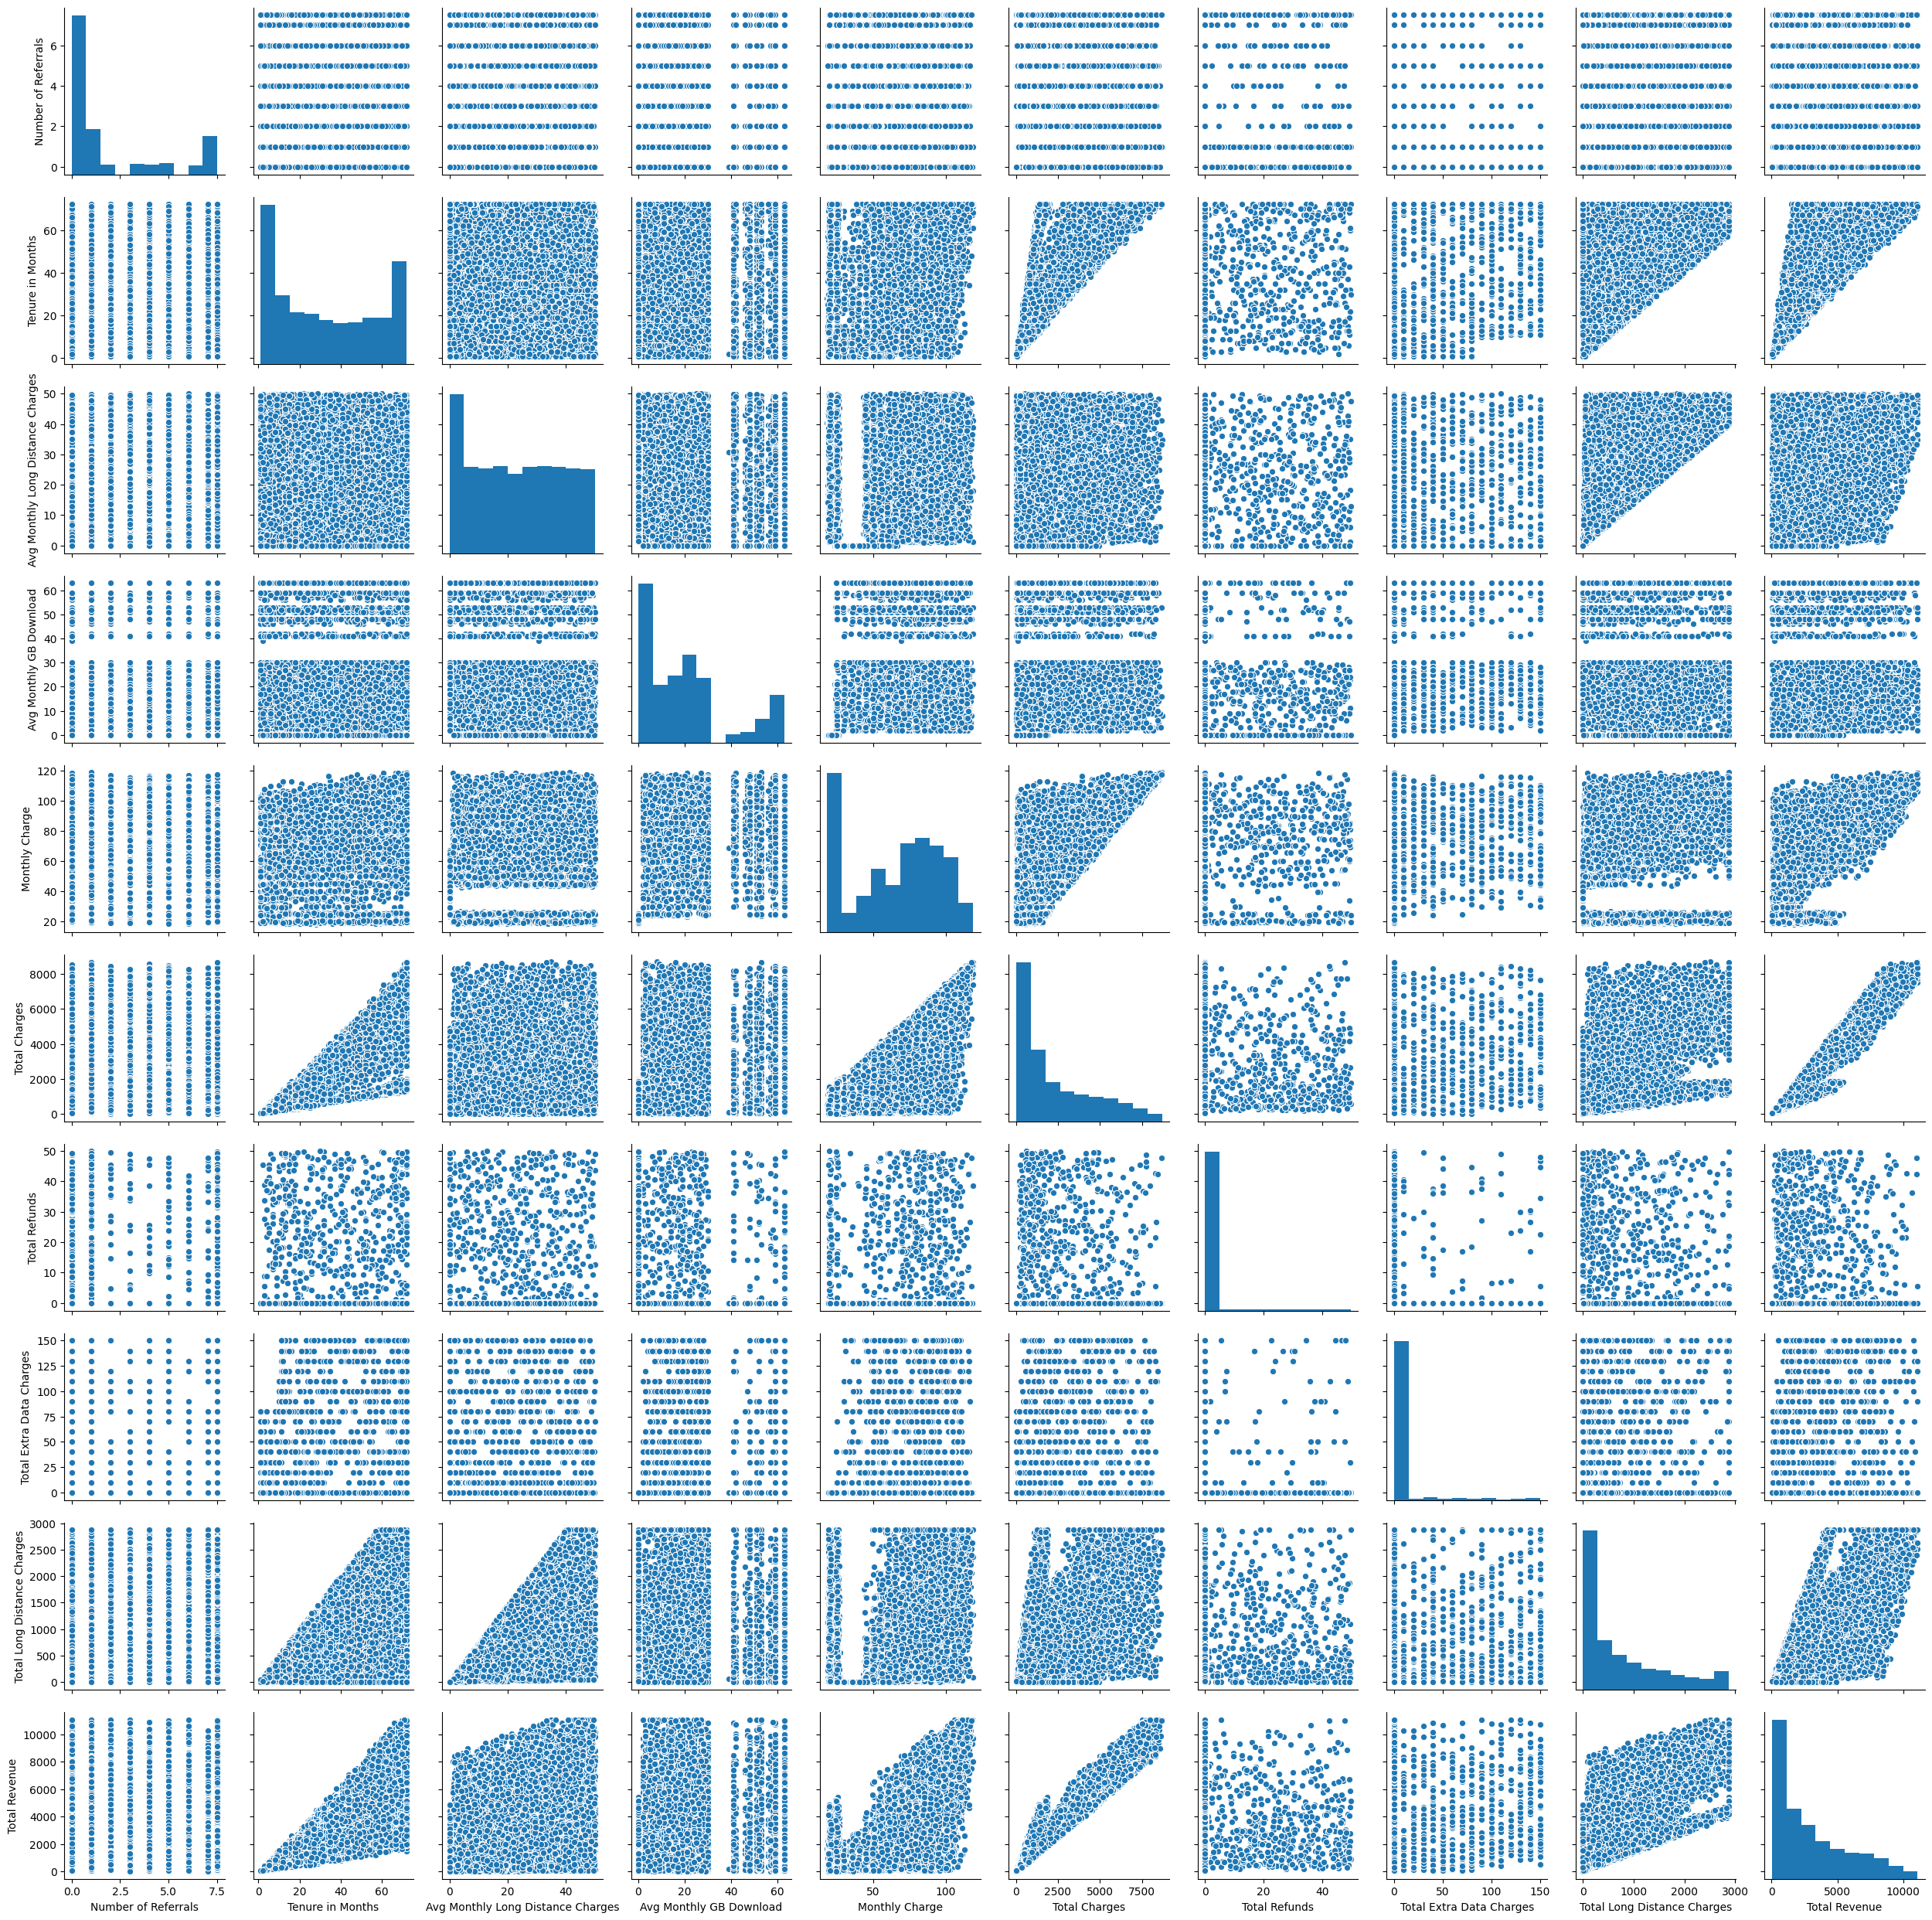

In [57]:
#Bivariate analysis
sns.pairplot(df_telcom_num)

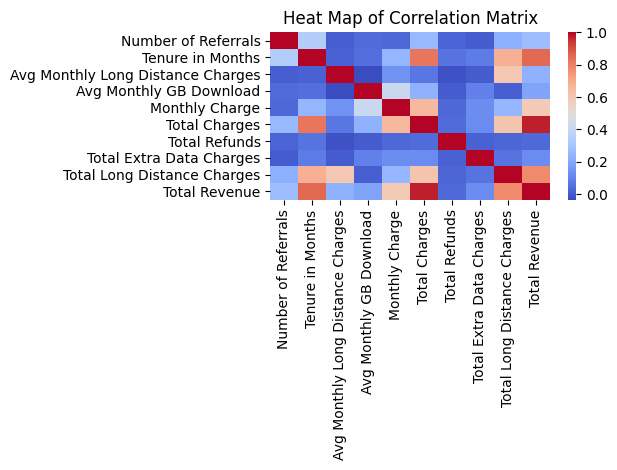

In [58]:
#Heatmap

corrmatrix = df_telcom_num.corr(method = "pearson")

sns.heatmap(corrmatrix, xticklabels = corrmatrix.columns, yticklabels = corrmatrix.columns, cmap = "coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

# Normalization

In [59]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return(x)

In [60]:
df_norm = norm_func(df_new.iloc[:,2:])

In [61]:
df_norm.describe()

Referred a Friend_Yes  Offer_Offer A  Offer_Offer B  Offer_Offer C  \
count            7043.000000    7043.000000    7043.000000    7043.000000   
mean                0.457476       0.073832       0.116996       0.058924   
std                 0.498224       0.261516       0.321438       0.235499   
min                 0.000000       0.000000       0.000000       0.000000   
25%                 0.000000       0.000000       0.000000       0.000000   
50%                 0.000000       0.000000       0.000000       0.000000   
75%                 1.000000       0.000000       0.000000       0.000000   
max                 1.000000       1.000000       1.000000       1.000000   

       Offer_Offer D  Offer_Offer E  Phone Service_Yes  Multiple Lines_Yes  \
count    7043.000000    7043.000000        7043.000000         7043.000000   
mean        0.085475       0.114298           0.903166            0.421837   
std         0.279607       0.318195           0.295752            0.493888   
min         0.000000       0.000000           0.000000            0.000000   
25%         0.000000       0.000000           1.000000            0.000000   
50%         0.000000       0.000000           1.000000            0.000000   
75%         0.000000       0.000000           1.000000            1.000000   
max         1.000000       1.000000           1.000000            1.000000   

       Internet Service_Yes  Internet Type_DSL  ...  Number of Referrals  \
count           7043.000000        7043.000000  ...          7043.000000   
mean               0.783331           0.234559  ...             0.240788   
std                0.412004           0.423753  ...             0.354803   
min                0.000000           0.000000  ...             0.000000   
25%                1.000000           0.000000  ...             0.000000   
50%                1.000000           0.000000  ...             0.000000   
75%                1.000000           0.000000  ...             0.400000   
max                1.000000           1.000000  ...             1.000000   

       Tenure in Months  Avg Monthly Long Distance Charges  \
count       7043.000000                        7043.000000   
mean           0.442067                           0.459271   
std            0.345663                           0.309024   
min            0.000000                           0.000000   
25%            0.112676                           0.184237   
50%            0.394366                           0.457892   
75%            0.760563                           0.728046   
max            1.000000                           1.000000   

       Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
count              7043.000000     7043.000000    7043.000000    7043.000000   
mean                  0.315718        0.462803       0.260972       0.039409   
std                   0.298775        0.299403       0.261507       0.158719   
min                   0.000000        0.000000       0.000000       0.000000   
25%                   0.047619        0.171642       0.044005       0.000000   
50%                   0.269841        0.518408       0.158753       0.000000   
75%                   0.428571        0.712438       0.434780       0.000000   
max                   1.000000        1.000000       1.000000       1.000000   

       Total Extra Data Charges  Total Long Distance Charges  Total Revenue  
count               7043.000000                  7043.000000    7043.000000  
mean                   0.045738                     0.257967       0.272003  
std                    0.167367                     0.286789       0.258463  
min                    0.000000                     0.000000       0.000000  
25%                    0.000000                     0.024564       0.052763  
50%                    0.000000                     0.139780       0.188500  
75%                    0.000000                     0.414738       0.431658  
max                  

# Hierarchical Clustering

In [62]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

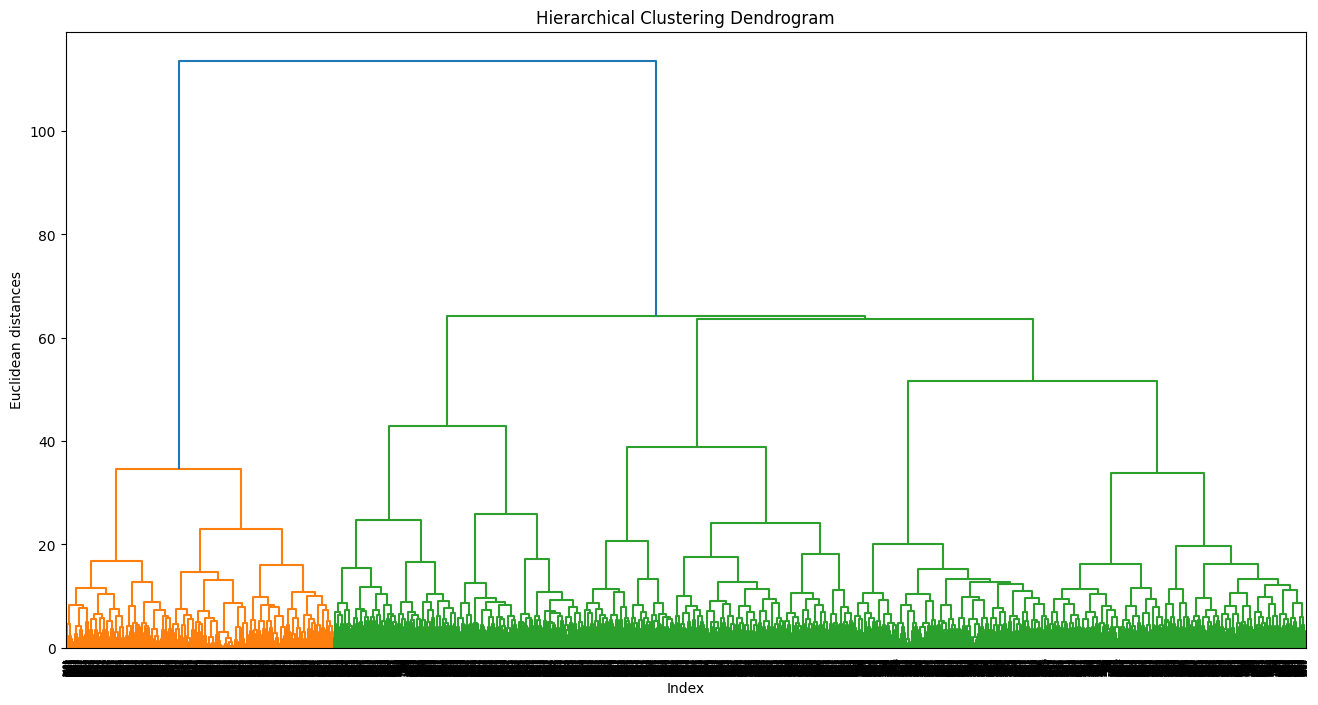

In [63]:
plt.figure(1, figsize = (16, 8))
tree_plot = dendrogram(linkage(df_norm, method = "ward"))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()

In [64]:
# Applying AgglomerativeClustering choosing 2 as clusters from the above dendrogram
hc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete' )

y_hc1 = hc1.fit_predict(df_norm)
y_hc1

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [65]:
np.unique(y_hc1)

array([0, 1], dtype=int64)

In [66]:
#average linkage
hc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')

y_hc2 = hc2.fit_predict(df_norm)
y_hc2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
np.unique(y_hc2)

array([0, 1], dtype=int64)

In [68]:
#single linkage
hc3 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

y_hc3 = hc3.fit_predict(df_norm)
y_hc3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
np.unique(y_hc3)

array([0, 1], dtype=int64)

In [70]:
# ward
hc4 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

y_hc4 = hc4.fit_predict(df_norm)
y_hc4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
hc2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
cluster_labels = pd.Series(hc4.labels_)

In [75]:
# Add cluster labels to original Dataset
df_telcom_num['cluster'] = cluster_labels
df_telcom_num.head()

Number of Referrals  Tenure in Months  Avg Monthly Long Distance Charges  \
0                  0.0                 1                               0.00   
1                  1.0                 8                              48.85   
2                  0.0                18                              11.33   
3                  1.0                25                              19.76   
4                  1.0                37                               6.33   

   Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
0                      8.0           39.65          39.65           0.00   
1                     17.0           80.65         633.30           0.00   
2                     52.0           95.45        1752.55          45.61   
3                     12.0           98.50        2514.50          13.43   
4                     14.0           76.50        2868.15           0.00   

   Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                        20                         0.00          59.65   
1                         0                       390.80        1024.10   
2                         0                       203.94        1910.88   
3                         0                       494.00        2995.07   
4                         0                       234.21        3102.36   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0

# Cluster Evaluation

In [76]:
df2 = df_telcom_num.sort_values(by = 'cluster', ascending = True)
df2

Number of Referrals  Tenure in Months  \
0                     0.0                 1   
4294                  5.0                61   
4293                  7.5                43   
4292                  0.0                64   
4290                  7.5                 1   
...                   ...               ...   
3889                  6.0                46   
1049                  0.0                51   
5562                  0.0                35   
5586                  2.0                19   
2886                  1.0                23   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
0                                  0.00                      8.0   
4294                              36.13                     23.0   
4293                              29.98                     59.0   
4292                              25.95                     23.0   
4290                              36.69                     63.0   
...                                 ...                      ...   
3889                               4.72                      0.0   
1049                              47.46                      0.0   
5562                              35.50                      0.0   
5586                              32.47                      0.0   
2886                              25.54                      0.0   

      Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
0              39.65          39.65            0.0                        20   
4294          101.15        6383.90            0.0                         0   
4293           75.20        3254.35            0.0                         0   
4292          104.65        6889.80            0.0                         0   
4290           55.30          55.30            0.0                         0   
...              ...            ...            ...                       ...   
3889           20.20         845.60            0.0                         0   
1049           19.60         967.90            0.0                         0   
5562           20.75         700.45            0.0                         0   
5586           19.90         357.70            0.0                         0   
2886           25.60         514.75            0.0                         0   

      Total Long Distance Charges  Total Revenue  cluster  
0                            0.00          59.65        0  
4294                      2203.93        8587.83        0  
4293                      1289.14        4543.49        0  
4292                      1660.80        8550.60        0  
4290                        36.69          91.99        0  
...                           ...            ...      ...  
3889                       217.12        1062.72        1  
1049                      2420.46        3388.36        1  
5562                      1242.50        1942.95        1  
5586                       616.93         974.63        1  
2886                       587.42        1102.17        1  

[7043 rows x 11 columns]

In [77]:
# Aggregate by doing mean of each cluster
df2.iloc[:,:].groupby(df2.cluster).mean()

Number of Referrals  Tenure in Months  \
cluster                                          
0                   1.753399         32.884720   
1                   1.995740         30.586501   

         Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
cluster                                                               
0                                22.401602                 25.39188   
1                                24.973965                  0.00000   

         Monthly Charge  Total Charges  Total Refunds  \
cluster                                                 
0             76.844254    2727.620228       2.047441   
1             21.079194     663.462936       1.653945   

         Total Extra Data Charges  Total Long Distance Charges  Total Revenue  
cluster                                                                        
0                        8.758383                   734.852027    3476.169389  
1                        0.000000                   762.603358    1432.040288

In [78]:
# Due to high Monthly Charges, Total charges and Total Extra Data Charges, It indicates that the telcom service provided to the customers belonging to cluster 0 is not enough and might churn.
# Customers in cluster 1 might be need some benefits for long distance charges because the Avg monthly long distance charges and total long distance charges are high compared to cluster 0 customers. 


In [79]:
#Dividing cluster data

In [80]:
cluster0 = df2.loc[(df2.cluster == 0), :]
cluster0

Number of Referrals  Tenure in Months  \
0                     0.0                 1   
4294                  5.0                61   
4293                  7.5                43   
4292                  0.0                64   
4290                  7.5                 1   
...                   ...               ...   
1903                  0.0                30   
1966                  0.0                37   
2773                  2.0                72   
2772                  7.5                71   
1911                  0.0                 3   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
0                                  0.00                      8.0   
4294                              36.13                     23.0   
4293                              29.98                     59.0   
4292                              25.95                     23.0   
4290                              36.69                     63.0   
...                                 ...                      ...   
1903                              11.73                     63.0   
1966                               0.00                     10.0   
2773                              17.30                     14.0   
2772                              34.72                     10.0   
1911                               0.00                     30.0   

      Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
0              39.65          39.65            0.0                        20   
4294          101.15        6383.90            0.0                         0   
4293           75.20        3254.35            0.0                         0   
4292          104.65        6889.80            0.0                         0   
4290           55.30          55.30            0.0                         0   
...              ...            ...            ...                       ...   
1903          100.20        2983.80            0.0                         0   
1966           28.60         973.55            0.0                         0   
2773          112.60        8126.65            0.0                         0   
2772           98.65        6962.85            0.0                         0   
1911           35.20         108.95            0.0                         0   

      Total Long Distance Charges  Total Revenue  cluster  
0                            0.00          59.65        0  
4294                      2203.93        8587.83        0  
4293                      1289.14        4543.49        0  
4292                      1660.80        8550.60        0  
4290                        36.69          91.99        0  
...                           ...            ...      ...  
1903                       351.90        3335.70        0  
1966                         0.00         973.55        0  
2773                      1245.60        9372.25        0  
2772                      2465.12        9427.97        0  
1911                         0.00         108.95        0  

[5517 rows x 11 columns]

In [81]:
cluster1 = df2.loc[(df2.cluster == 1), :]
cluster1

Number of Referrals  Tenure in Months  \
6361                  0.0                57   
490                   7.0                71   
2482                  0.0                56   
6110                  0.0                 1   
6123                  0.0                48   
...                   ...               ...   
3889                  6.0                46   
1049                  0.0                51   
5562                  0.0                35   
5586                  2.0                19   
2886                  1.0                23   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
6361                               1.69                      0.0   
490                               30.72                      0.0   
2482                               2.58                      0.0   
6110                               1.47                      0.0   
6123                              30.82                      0.0   
...                                 ...                      ...   
3889                               4.72                      0.0   
1049                              47.46                      0.0   
5562                              35.50                      0.0   
5586                              32.47                      0.0   
2886                              25.54                      0.0   

      Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
6361           20.65        1125.60            0.0                         0   
490            23.95        1756.20            0.0                         0   
2482           24.90        1334.00            0.0                         0   
6110           20.65          20.65            0.0                         0   
6123           24.00        1183.05            0.0                         0   
...              ...            ...            ...                       ...   
3889           20.20         845.60            0.0                         0   
1049           19.60         967.90            0.0                         0   
5562           20.75         700.45            0.0                         0   
5586           19.90         357.70            0.0                         0   
2886           25.60         514.75            0.0                         0   

      Total Long Distance Charges  Total Revenue  cluster  
6361                        96.33        1221.93        1  
490                       2181.12        3937.32        1  
2482                       144.48        1478.48        1  
6110                         1.47          22.12        1  
6123                      1479.36        2662.41        1  
...                           ...            ...      ...  
3889                       217.12        1062.72        1  
1049                      2420.46        3388.36        1  
5562                      1242.50        1942.95        1  
5586                       616.93         974.63        1  
2886                       587.42        1102.17        1  

[1526 rows x 11 columns]

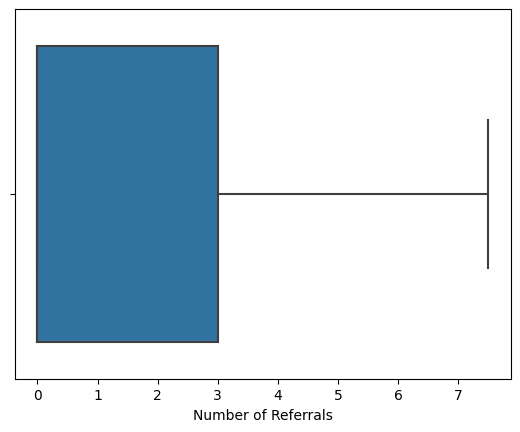

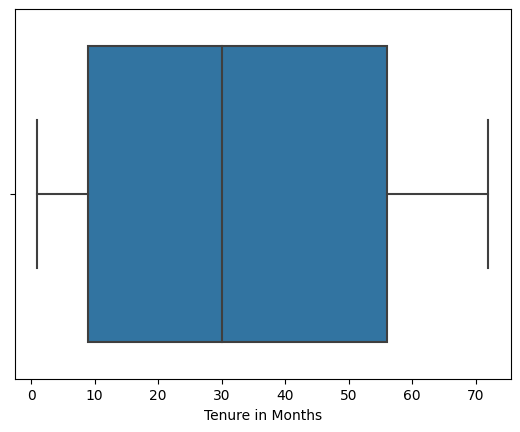

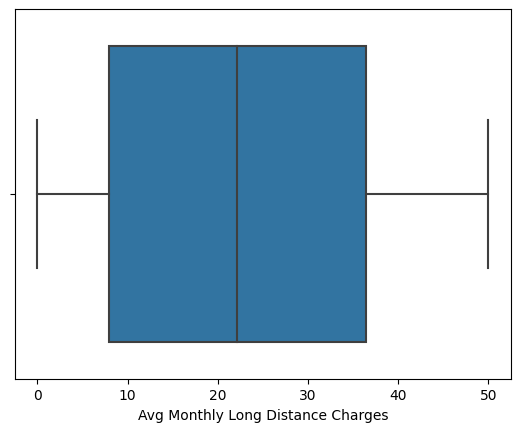

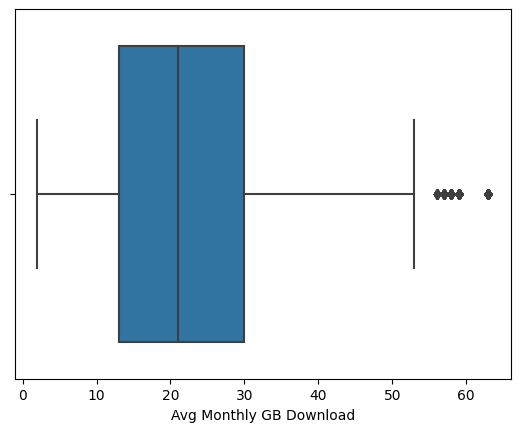

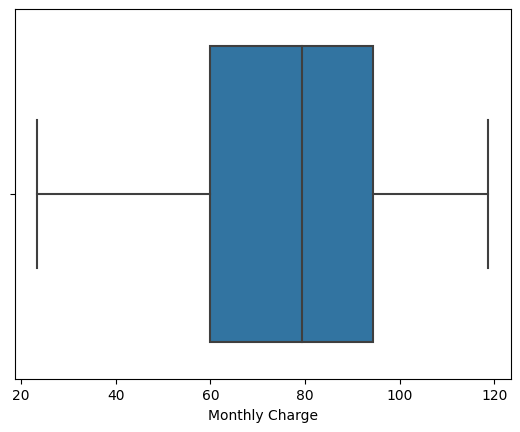

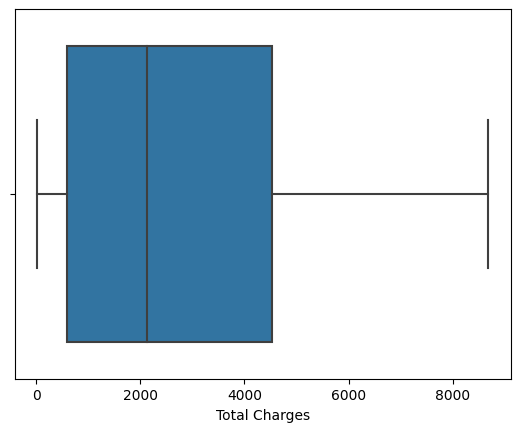

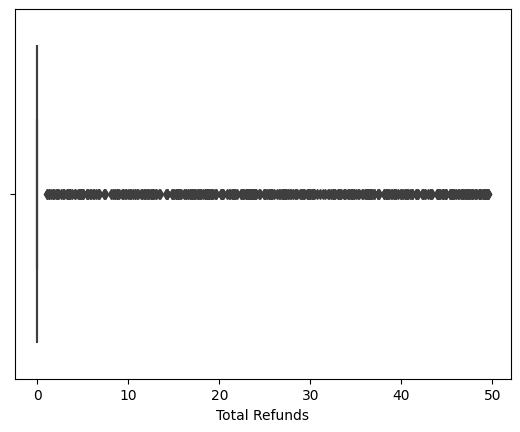

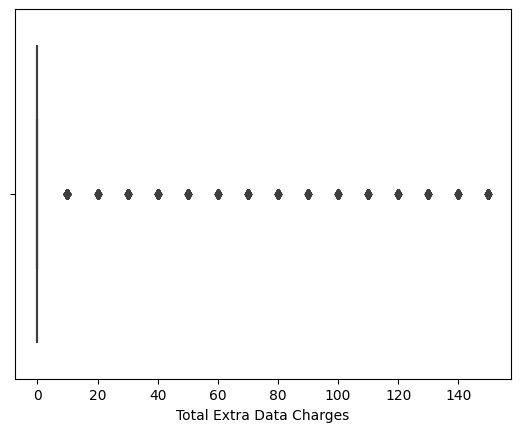

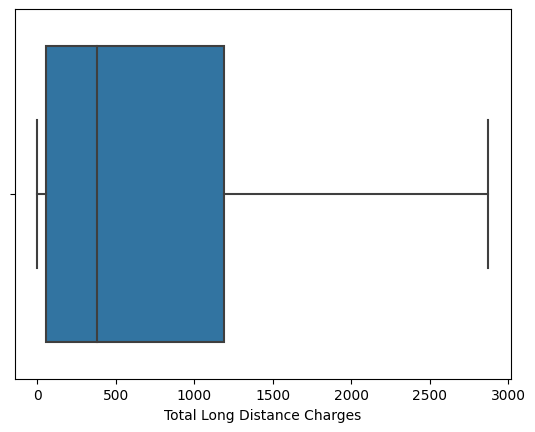

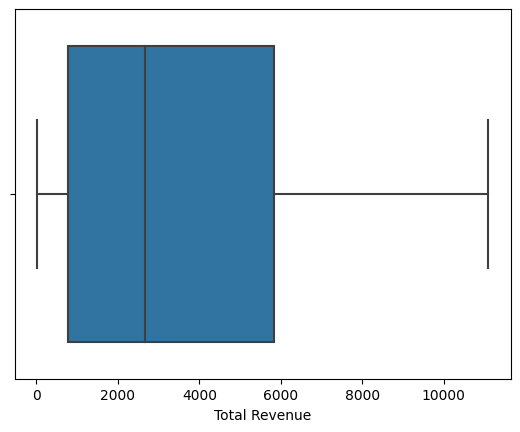

In [82]:
#Another way of evaluating clusters is using outliers
for i in cluster0.columns[:10]:
    sns.boxplot(x = cluster0[i])
    plt.show()

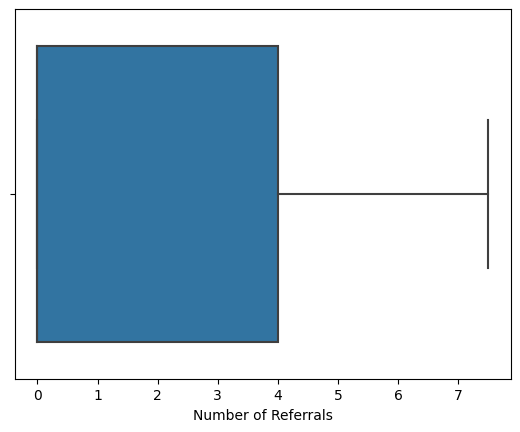

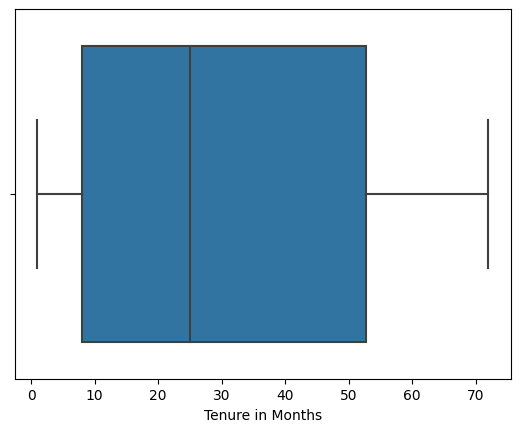

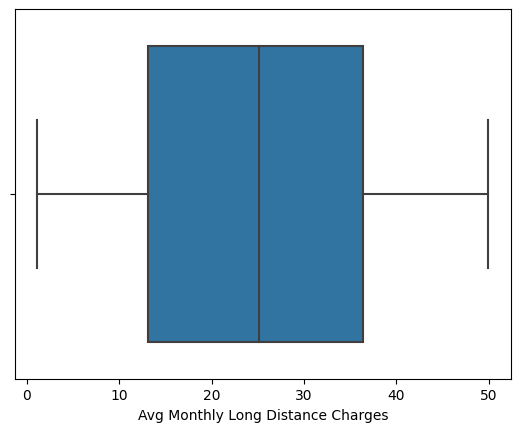

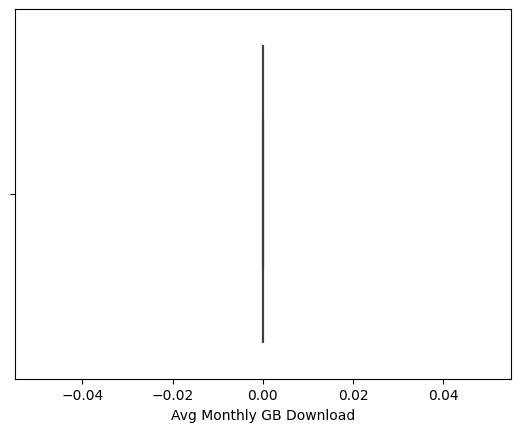

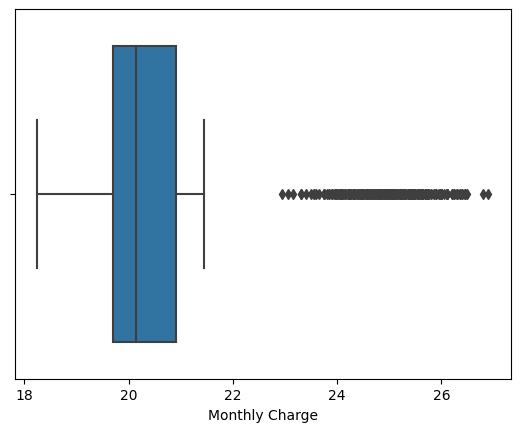

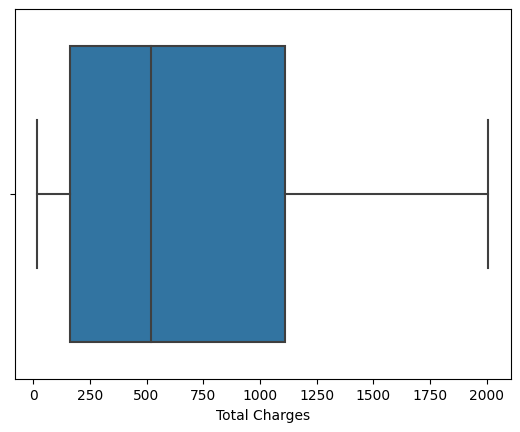

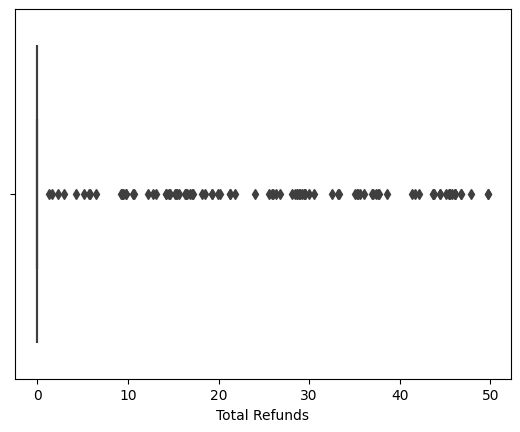

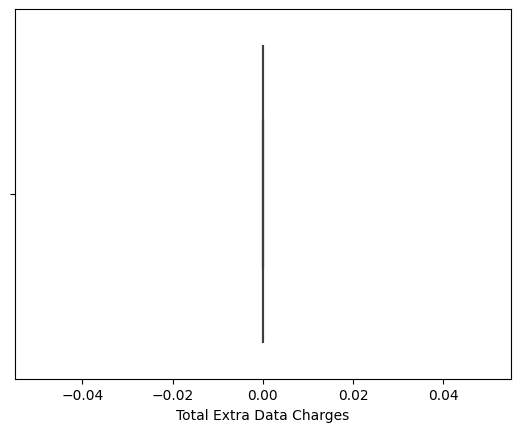

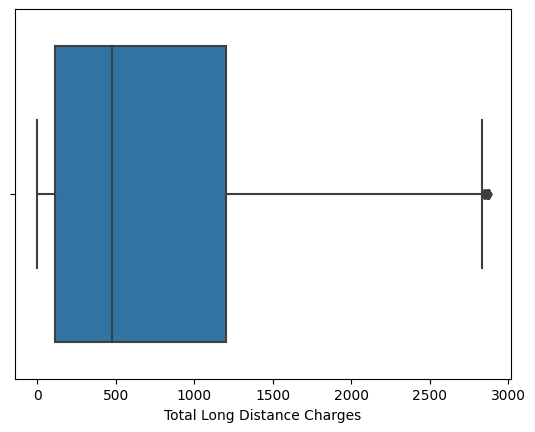

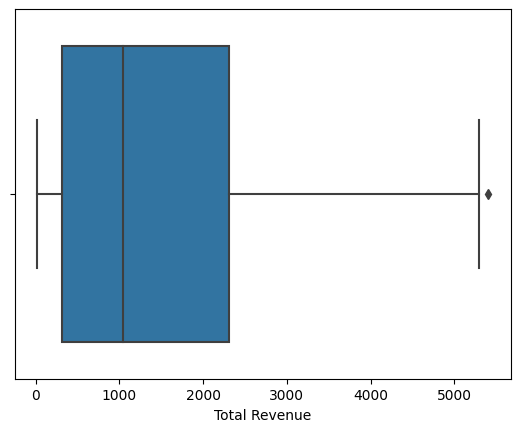

In [83]:
for i in cluster1.columns[:10]:
    sns.boxplot(x = cluster1[i])
    plt.show()

In [84]:
df_norm

Referred a Friend_Yes  Offer_Offer A  Offer_Offer B  Offer_Offer C  \
0                       0.0            0.0            0.0            0.0   
1                       1.0            0.0            0.0            0.0   
2                       0.0            0.0            0.0            0.0   
3                       1.0            0.0            0.0            1.0   
4                       1.0            0.0            0.0            1.0   
...                     ...            ...            ...            ...   
7038                    0.0            0.0            0.0            0.0   
7039                    1.0            0.0            0.0            1.0   
7040                    1.0            0.0            0.0            0.0   
7041                    1.0            0.0            0.0            0.0   
7042                    0.0            0.0            0.0            0.0   

      Offer_Offer D  Offer_Offer E  Phone Service_Yes  Multiple Lines_Yes  \
0               0.0            0.0                0.0                 0.0   
1               0.0            1.0                1.0                 1.0   
2               1.0            0.0                1.0                 1.0   
3               0.0            0.0                1.0                 0.0   
4               0.0            0.0                1.0                 1.0   
...             ...            ...                ...                 ...   
7038            0.0            0.0                1.0                 0.0   
7039            0.0            0.0                1.0                 1.0   
7040            0.0            0.0                1.0                 1.0   
7041            0.0            0.0                0.0                 0.0   
7042            0.0            0.0                1.0                 0.0   

      Internet Service_Yes  Internet Type_DSL  ...  Number of Referrals  \
0                      1.0                1.0  ...             0.000000   
1                      1.0                0.0  ...             0.133333   
2                      1.0                0.0  ...             0.000000   
3                      1.0                0.0  ...             0.133333   
4                      1.0                0.0  ...             0.133333   
...                    ...                ...  ...                  ...   
7038                   0.0                0.0  ...             0.000000   
7039                   1.0                0.0  ...             0.133333   
7040                   1.0                0.0  ...             0.533333   
7041                   1.0                1.0  ...             0.133333   
7042                   1.0                0.0  ...             0.000000   

      Tenure in Months  Avg Monthly Long Distance Charges  \
0             0.000000                           0.000000   
1             0.098592                           0.977195   
2             0.239437                           0.226645   
3             0.338028                           0.395279   
4             0.507042                           0.126625   
...                ...                                ...   
7038          1.000000                           0.455491   
7039          0.323944                           0.721144   
7040          1.000000                           0.593319   
7041          0.140845                           0.000000   
7042          0.915493                           0.619324   

      Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
0                    0.126984        0.212935       0.002406       0.000000   
1                    0.269841        0.620896       0.070909       0.000000   
2                    0.825397        0.768159       0.200063       0.916047   
3                    0.190476        0.798507       0.287988       0.269733   
4                    0.222222        0.579602       0.328796       0.000000   
...                       ...             ...            ...

# Silhouette coefficient:

In [85]:
from sklearn import metrics

In [86]:
# Silhouette coefficient value ranges between (-1 to +1). 
# 1 being the best meaning that the data point is very compact within the cluster to which it belongs and far away from the other clusters.
# Values near 0 denote overlapping clusters.

In [87]:
metrics.silhouette_score(df_norm, cluster_labels)

0.17848217108284975

Calinski Harabasz

In [88]:
#Higher value means clusters are well separated
metrics.calinski_harabasz_score(df_norm, cluster_labels)

1496.4896508539293

Davies-Bouldin Index:

In [89]:
#The lower value means better the separation between your clusters.
metrics.davies_bouldin_score(df_norm, cluster_labels)

1.5789022413210145

In [90]:
from clusteval import clusteval
import numpy as np

#Silhouette cluster evaluation.
ce = clusteval(evaluate='silhouette')

In [91]:
df_array = np.array(df_norm)


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:24<00:00,  1.05s/it]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


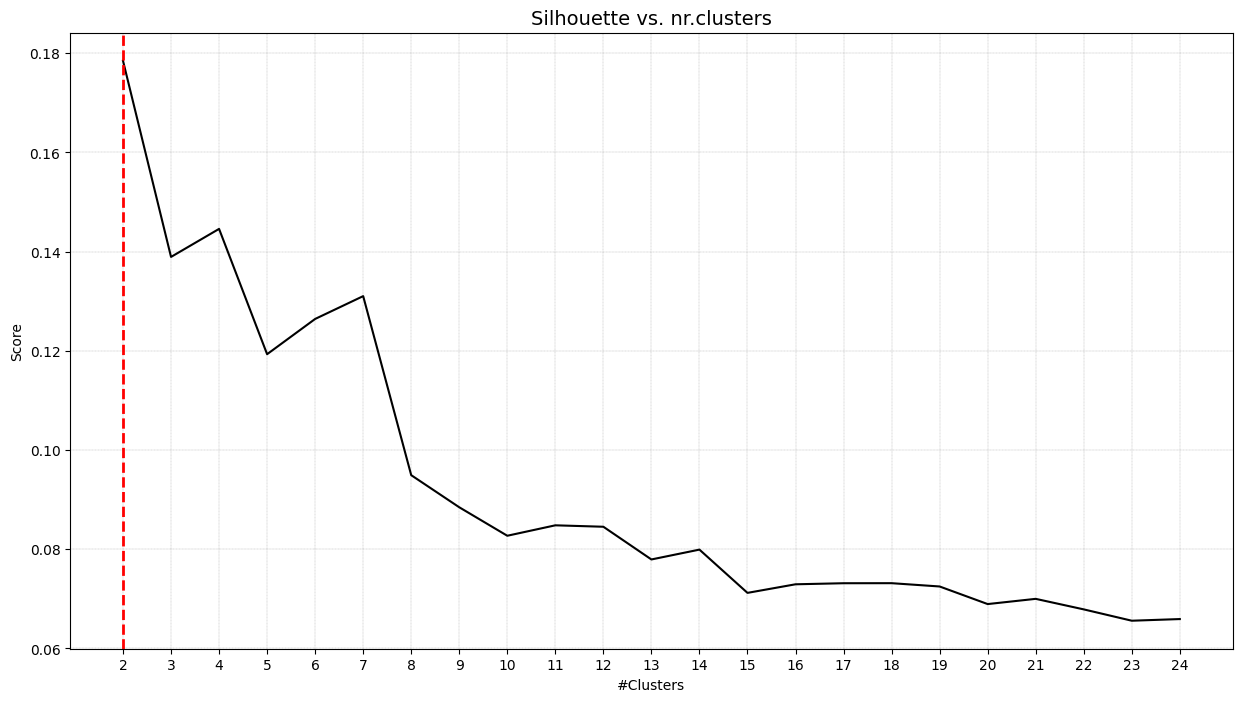

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [92]:
#Fit
ce.fit(df_array)

ce.plot()

In [ ]:
# Best possible clusters for the telecom churn dataset is 2.